In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [7]:
df=pd.read_csv('car.csv')


In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df.shape

(301, 9)

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
#getting some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
#checking the numbers of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
#checking the distribution of cateogorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# ENCODING THE CATEOGORICAL DATA


In [15]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1, 'CNG':2}}, inplace=True)

df.replace({'Seller_Type':{'Dealer':0,'Individual':1,}}, inplace=True)

df.replace({'Transmission':{'Manual':0,'Automatic':1,}}, inplace=True)



In [17]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


SPLITTING THE DATA AND TARGET


In [21]:
X=df.drop(['Car_Name','Selling_Price'] ,axis=1)
Y=df['Selling_Price']

In [23]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [24]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


SPLITTING TRAINING AND TEST DATA


In [25]:
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.1, random_state=2)

MODEL TRAINING 

In [26]:
#loading linear regression model
lin_reg_model=LinearRegression()

In [27]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

PREDICTION ON TRAINING DATA


In [28]:
training_data_prediction=lin_reg_model.predict(X_train)

In [29]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error :" , error_score)

R squared Error : 0.8799451660493711


VISULIZATION


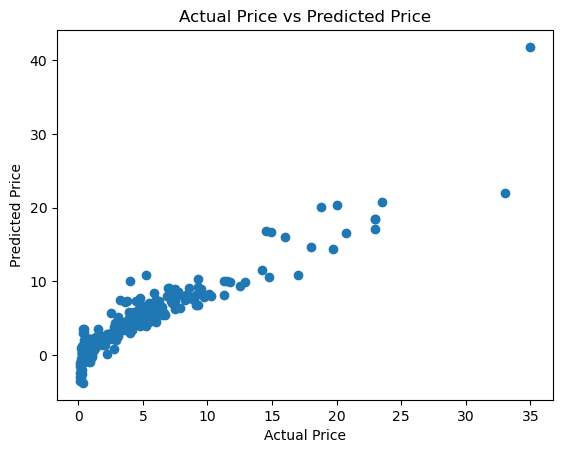

In [31]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [32]:
test_data_prediction=lin_reg_model.predict(X_test)

In [35]:
error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8365766715026396


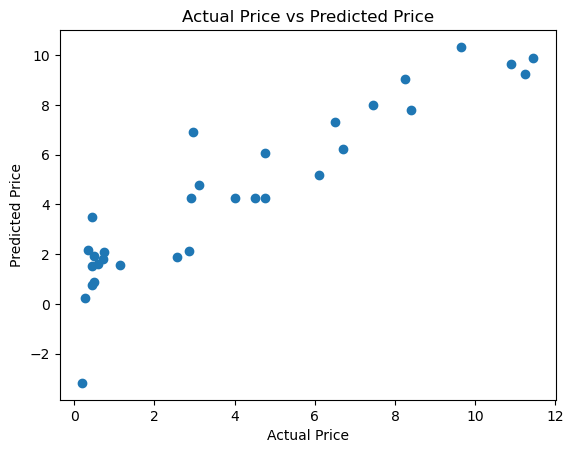

In [36]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

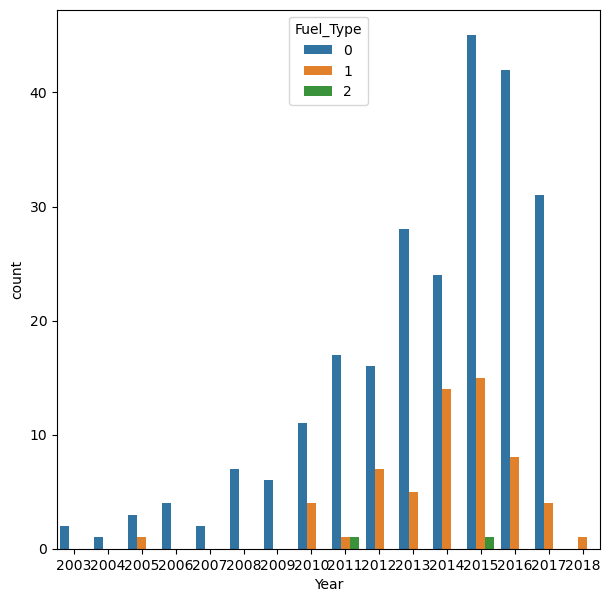

In [38]:
plt.figure(figsize=(7,7))
sns.countplot('Year',hue='Fuel_Type',data=df)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

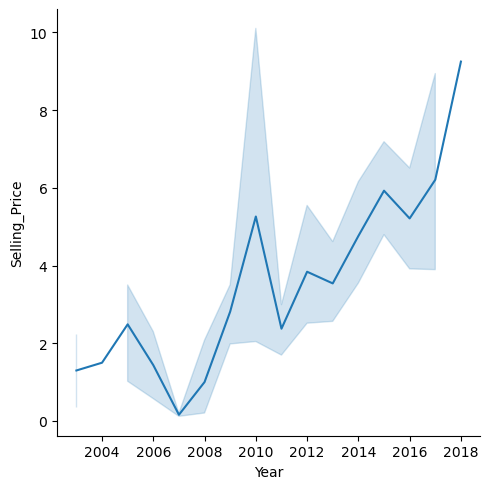

In [39]:
fig=plt.figure(figsize=(10,10))
sns.relplot('Year','Selling_Price',data=df,kind='line')

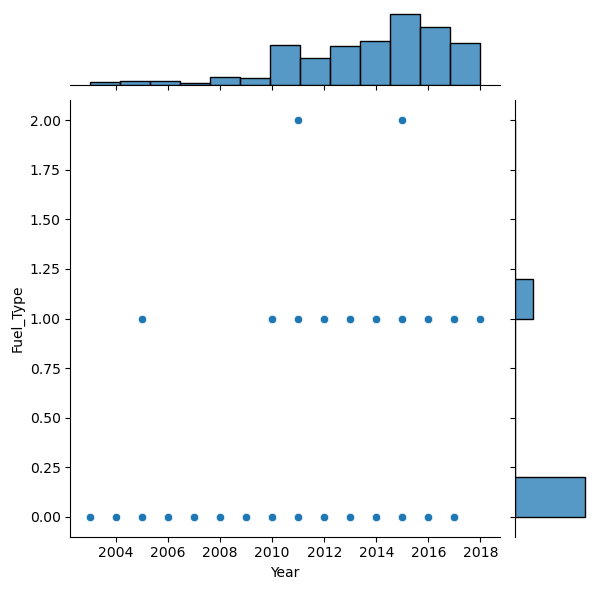

In [40]:
sns.jointplot(data=df, x="Year", y="Fuel_Type")

<AxesSubplot:xlabel='Selling_Price', ylabel='Seller_Type'>

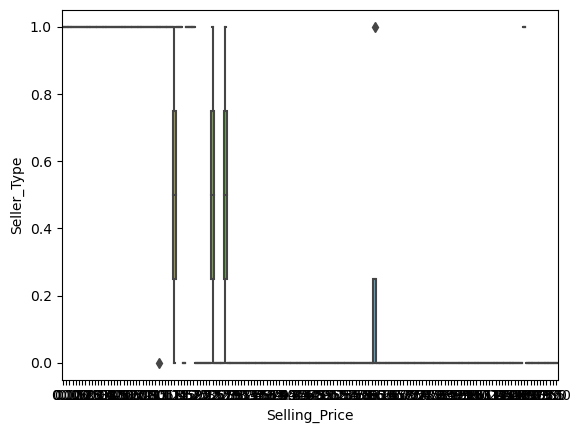

In [41]:
sns.boxplot(x='Selling_Price', y="Seller_Type", data=df)

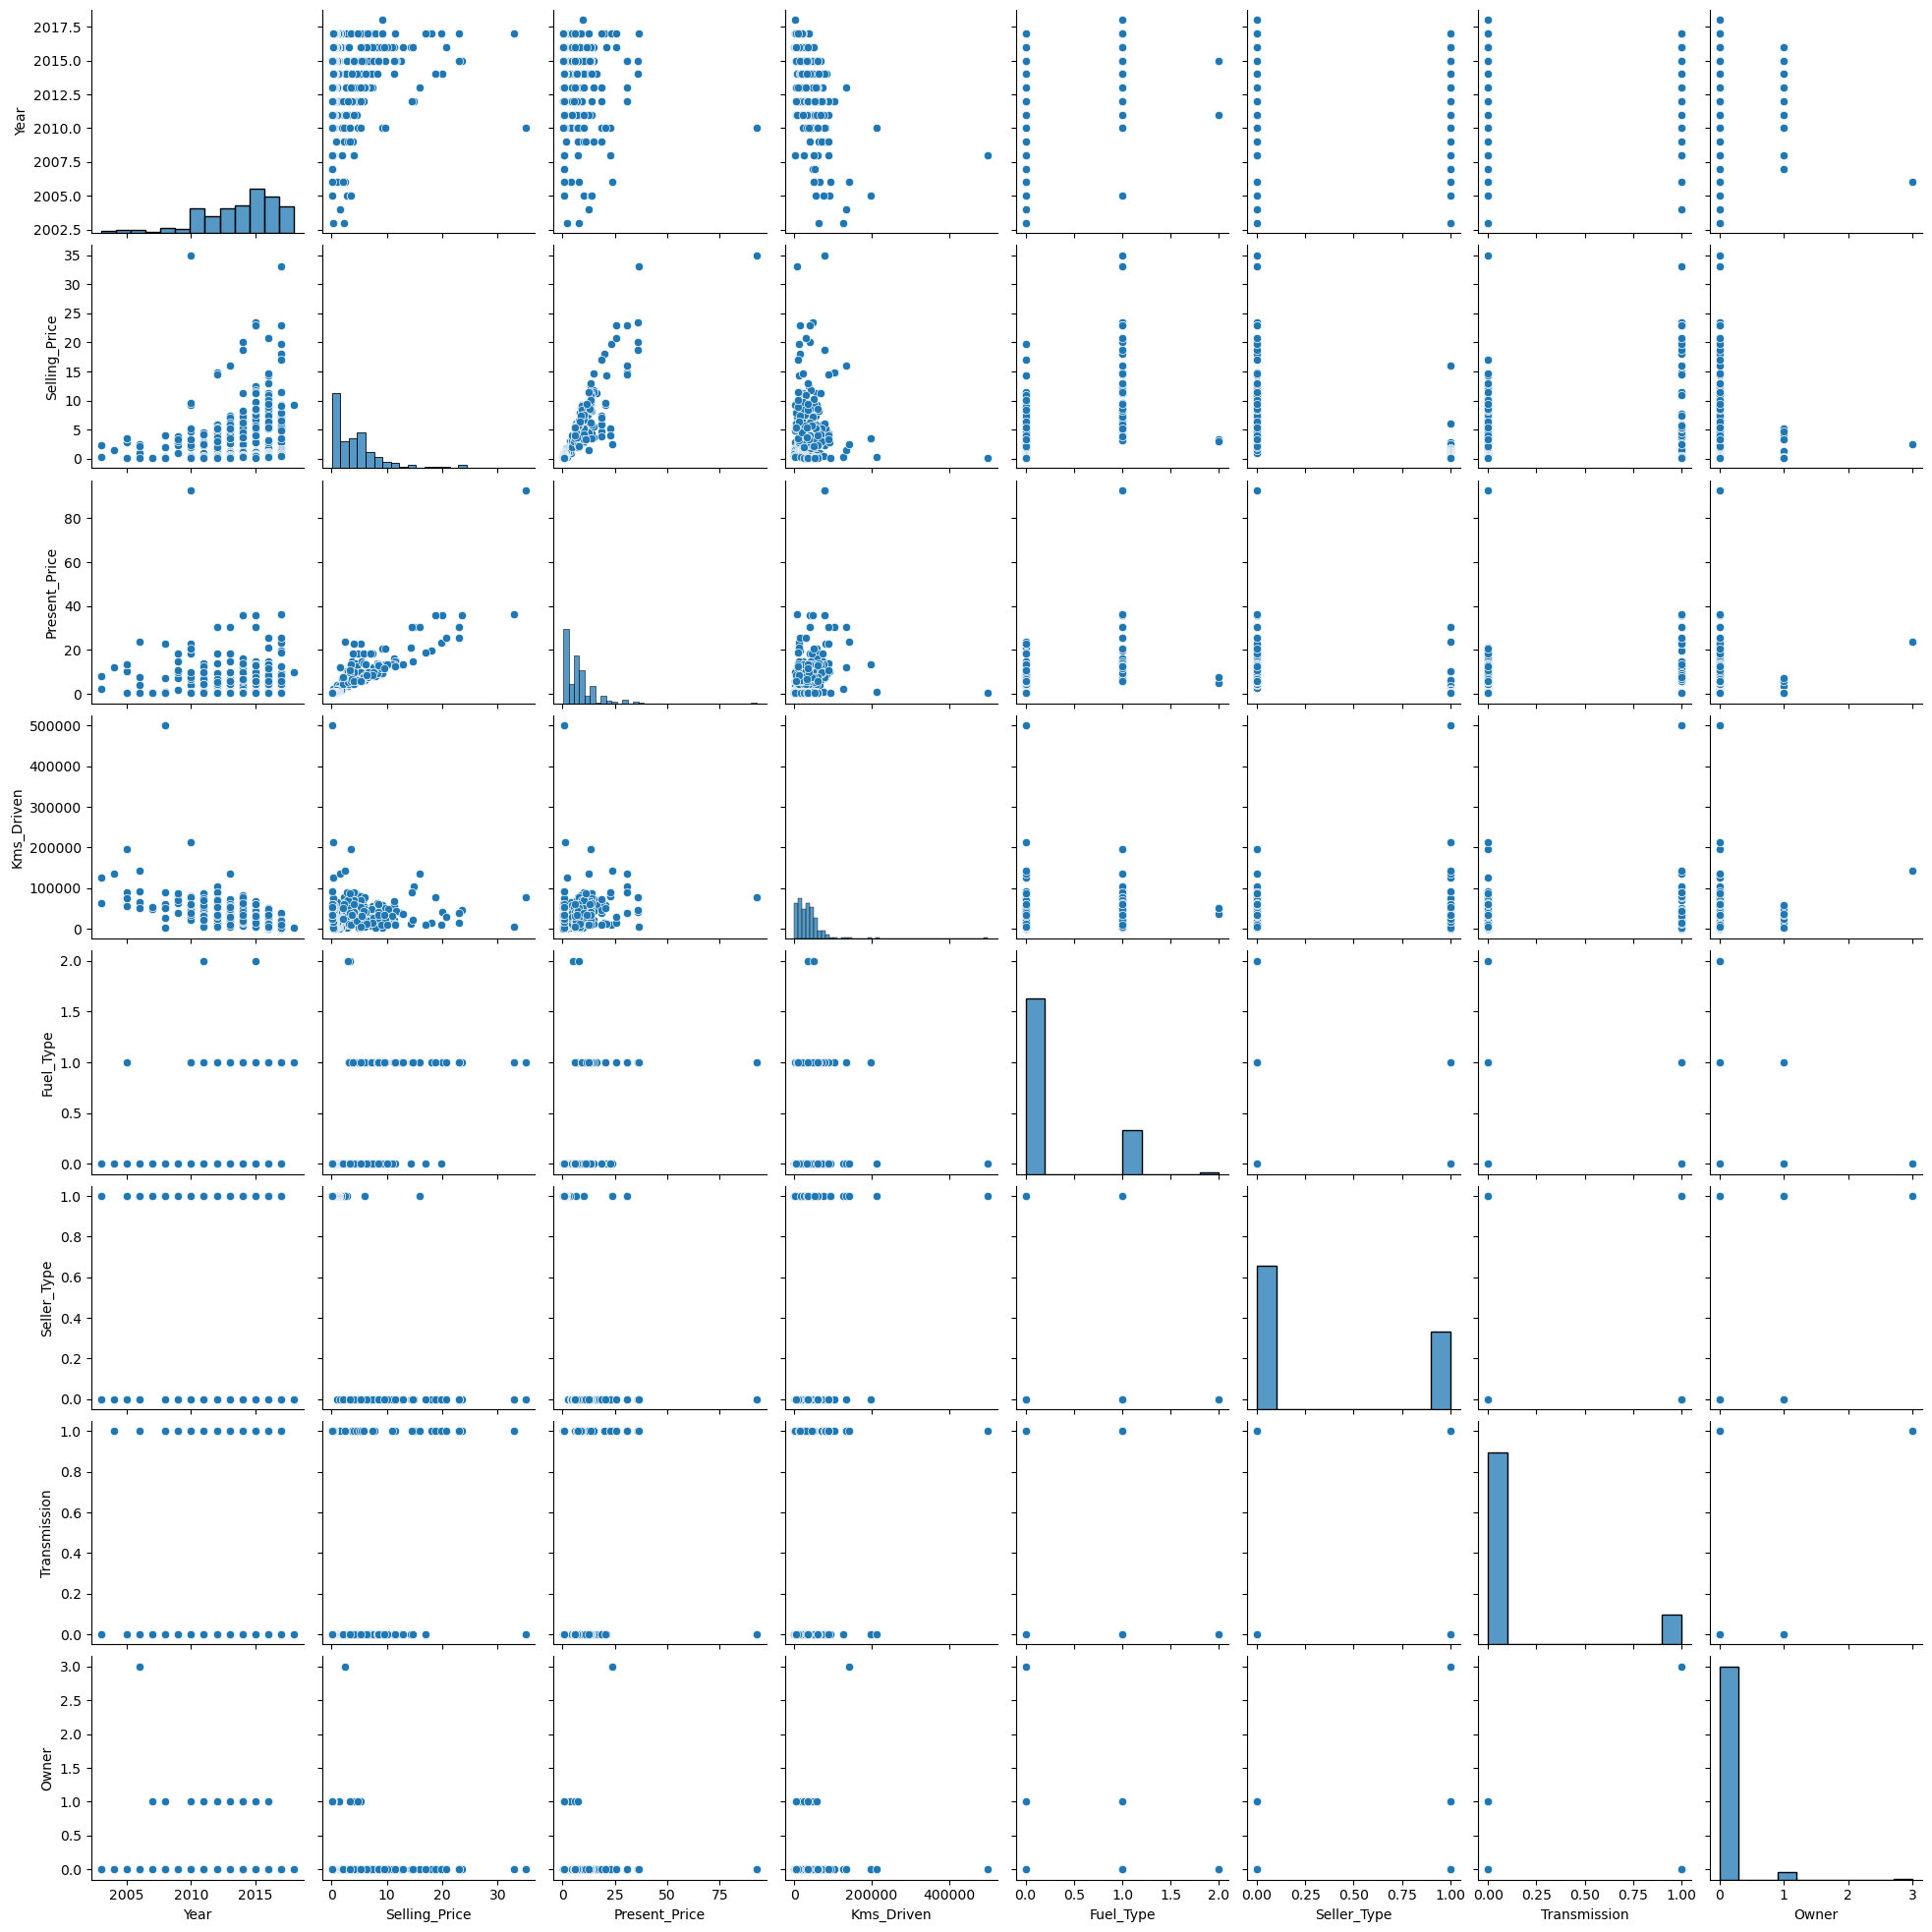

In [42]:
sns.pairplot(data=df)

<AxesSubplot:>

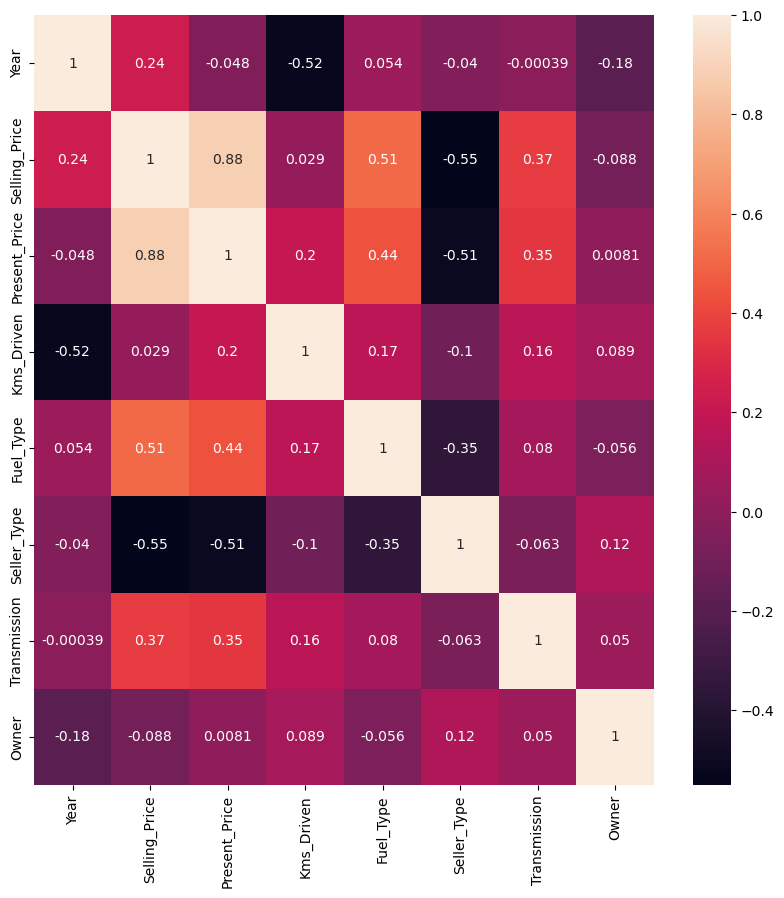

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)